<font font size="6" color=Blue>**Project-03**</font>
<br>
<font font size="20" color=Blue>**Image Tagging and Road Object Detection**</font>
<br>
<font font size="4" color=Black>by</font>
<br>
<font font size="6" color=Orange>Kalyana Varma Polapragada, Niranjan Mohapatra, STP Bharadwaja.</font>

## **Step-01: Get the Source Files.**

#### Note: To execute this project, we need some source files. Get the following source files.
* Make sure the YOLOv3 initial weights file is copied to the Google drive with the following path:
  - Project3_Files/darknet53.conv.74
  - Please note that 'darknet53.conv.74' is intial YOLOv3 weights file for training custom data and 'yolov3_bdd100k_train_last.weights' is fully trained weights file.
* Also make sure the training data image and label zip files are copied to the Google drive with the following path:
  - Project3_Files/Training_Data/bdd100k_seg_track_20_images.zip
  - Project3_Files/Training_Data/bdd100k_box_track_20_labels_trainval.zip
<br><br>
<font size="03" color=Green>
In case, not yet copied, then please copy right now.
</font>

## **Step-02: Keep the System Upto Date.**

In [ ]:
"""
Google Colab or Google Colab Pro basically provide the Ubuntu based system,
which means we have a Ubuntu Linux system to work on.
"""

# Upgrade and Update the system.
!apt update
print("-----------------------------------------------------------------------")
!apt upgrade -y

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:4 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [696 B]
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:9 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:12 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Packages [917 kB]
Hit:13 http://ppa.laun

In [ ]:
# Get the system and version details.
!uname -m && cat /etc/*release
print("-----------------------------------------------------------------------")
!gcc --version
print("-----------------------------------------------------------------------")
!uname -r

x86_64
DISTRIB_ID=Ubuntu
DISTRIB_RELEASE=18.04
DISTRIB_CODENAME=bionic
DISTRIB_DESCRIPTION="Ubuntu 18.04.6 LTS"
NAME="Ubuntu"
VERSION="18.04.6 LTS (Bionic Beaver)"
ID=ubuntu
ID_LIKE=debian
PRETTY_NAME="Ubuntu 18.04.6 LTS"
VERSION_ID="18.04"
HOME_URL="https://www.ubuntu.com/"
SUPPORT_URL="https://help.ubuntu.com/"
BUG_REPORT_URL="https://bugs.launchpad.net/ubuntu/"
PRIVACY_POLICY_URL="https://www.ubuntu.com/legal/terms-and-policies/privacy-policy"
VERSION_CODENAME=bionic
UBUNTU_CODENAME=bionic
-----------------------------------------------------------------------
gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
Copyright (C) 2017 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.

-----------------------------------------------------------------------
5.4.144+


In [ ]:
# Get the GPU info.
!nvidia-smi

Sat Feb 19 00:12:20 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P0    30W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# Check CUDA version.
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0


In [ ]:
# Check CUDA.
!ls -l /usr/local/

total 76
drwxr-xr-x 1 root root 4096 Feb 17 14:14 bin
lrwxrwxrwx 1 root root   22 Feb  1 14:25 cuda -> /etc/alternatives/cuda
drwxr-xr-x 1 root root 4096 Feb  1 14:17 cuda-10.0
drwxr-xr-x 1 root root 4096 Feb  1 14:20 cuda-10.1
drwxr-xr-x 3 root root 4096 Feb 19 00:09 cuda-10.2
lrwxrwxrwx 1 root root   25 Feb  1 14:25 cuda-11 -> /etc/alternatives/cuda-11
drwxr-xr-x 1 root root 4096 Feb  1 14:22 cuda-11.0
drwxr-xr-x 1 root root 4096 Feb  1 14:24 cuda-11.1
drwxr-xr-x 1 root root 4096 Feb 11 16:59 etc
drwxr-xr-x 2 root root 4096 Nov 19  2020 games
drwxr-xr-x 2 root root 4096 Feb 11 17:08 _gcs_config_ops.so
drwxr-xr-x 1 root root 4096 Feb 11 17:17 include
drwxr-xr-x 1 root root 4096 Feb 11 17:17 lib
-rw-r--r-- 1 root root 1636 Feb 11 17:12 LICENSE.txt
drwxr-xr-x 3 root root 4096 Feb 11 17:08 licensing
lrwxrwxrwx 1 root root    9 Nov 19  2020 man -> share/man
drwxr-xr-x 2 root root 4096 Nov 19  2020 sbin
-rw-r--r-- 1 root root 7291 Feb 11 17:12 setup.cfg
drwxr-xr-x 1 root root 4096 Feb 11 1

In [ ]:
"""
# In case of Colab Pro which comes with Tesla P100 GPU, then execute this command.
# Reference: https://docs.nvidia.com/deploy/cuda-compatibility/
"""

# Install GPU related packages.
!sudo apt-get install -y cuda-compat-11-2

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following packages were automatically installed and are no longer required:
  cuda-command-line-tools-10-0 cuda-command-line-tools-10-1
  cuda-command-line-tools-11-0 cuda-compiler-10-0 cuda-compiler-10-1
  cuda-compiler-11-0 cuda-cuobjdump-10-0 cuda-cuobjdump-10-1
  cuda-cuobjdump-11-0 cuda-cupti-10-0 cuda-cupti-10-1 cuda-cupti-11-0
  cuda-cupti-dev-11-0 cuda-documentation-10-0 cuda-documentation-10-1
  cuda-documentation-11-0 cuda-documentation-11-1 cuda-gdb-10-0 cuda-gdb-10-1
  cuda-gdb-11-0 cuda-gpu-library-advisor-10-0 cuda-gpu-library-advisor-10-1
  cuda-libraries-10-0 cuda-libraries-10-1 cuda-libraries-11-0
  cuda-memcheck-10-0 cuda-memcheck-10-1 cuda-memcheck-11-0 cuda-nsight-10-0
  cuda-nsight-10-1 cuda-nsight-11-0 cuda-nsight-11-1 cuda-nsight-compute-10-0
  cuda-nsight-compute-10-1 cuda-nsight-compute-11-0 cuda-nsight-compute-11-1
  cuda-nsight-systems-10-1 cuda-nsight-systems-

In [ ]:
# """
# # In case of Free Colab which comes with Tesla K80 GPU, then execute these commands.
# # Reference: https://developer.nvidia.com/cuda-downloads?target_os=Linux&target_arch=x86_64&Distribution=Ubuntu&target_version=18.04&target_type=deb_network
# """

# !wget https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64/cuda-ubuntu1804.pin
# !sudo mv cuda-ubuntu1804.pin /etc/apt/preferences.d/cuda-repository-pin-600
# !sudo apt-key adv --fetch-keys https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64/7fa2af80.pub
# !sudo add-apt-repository "deb https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64/ /"
# !sudo apt-get update
# !sudo apt-get -y install cuda

## **Step-03: Get the Modified Version of Darknet i.e. 'AlexeyAB'.**

In [ ]:
# Clone the 'github' repository to install the 'darknet' framework.
!git clone https://github.com/AlexeyAB/darknet.git

Cloning into 'darknet'...
remote: Enumerating objects: 15395, done.
remote: Total 15395 (delta 0), reused 0 (delta 0), pack-reused 15395
Receiving objects: 100% (15395/15395), 14.02 MiB | 12.81 MiB/s, done.
Resolving deltas: 100% (10353/10353), done.


In [ ]:
# Check the present working directory and the files.
!pwd
print("-----------------------------------------------------------------------")
!ls -l

/content
-----------------------------------------------------------------------
total 8
drwxr-xr-x 14 root root 4096 Feb 19 00:12 darknet
drwxr-xr-x  1 root root 4096 Feb  1 14:32 sample_data


In [ ]:
# # Move to the 'root' directory of the 'darknet' framework.
# %cd /content/darknet

# Check the content of the 'darknet' folder.
!ls -l /content/darknet

total 240
drwxr-xr-x 4 root root  4096 Feb 19 00:12 3rdparty
drwxr-xr-x 3 root root  4096 Feb 19 00:12 build
-rwxr-xr-x 1 root root 31389 Feb 19 00:12 build.ps1
drwxr-xr-x 3 root root  4096 Feb 19 00:12 cfg
drwxr-xr-x 3 root root  4096 Feb 19 00:12 cmake
-rw-r--r-- 1 root root 24768 Feb 19 00:12 CMakeLists.txt
-rw-r--r-- 1 root root  1406 Feb 19 00:12 DarknetConfig.cmake.in
-rw-r--r-- 1 root root  9469 Feb 19 00:12 darknet_images.py
-rw-r--r-- 1 root root 10828 Feb 19 00:12 darknet.py
-rw-r--r-- 1 root root  6747 Feb 19 00:12 darknet_video.py
drwxr-xr-x 3 root root  4096 Feb 19 00:12 data
-rwxr-xr-x 1 root root   110 Feb 19 00:12 image_yolov3.sh
-rwxr-xr-x 1 root root   110 Feb 19 00:12 image_yolov4.sh
drwxr-xr-x 2 root root  4096 Feb 19 00:12 include
-rwxr-xr-x 1 root root   345 Feb 19 00:12 json_mjpeg_streams.sh
-rw-r--r-- 1 root root   515 Feb 19 00:12 LICENSE
-rw-r--r-- 1 root root  5961 Feb 19 00:12 Makefile
-rwxr-xr-x 1 root root   159 Feb 19 00:12 net_cam_v3.sh
-rwxr-xr-x 1 root

## **Step-04: Install 'OpenCV' and 'ffmpeg'.**

In [ ]:
# Install 'OpenCV' and 'ffmpeg'.
!apt install libopencv-dev python-opencv ffmpeg

Reading package lists... Done
Building dependency tree       
Reading state information... Done
ffmpeg is already the newest version (7:3.4.8-0ubuntu0.2).
libopencv-dev is already the newest version (3.2.0+dfsg-4ubuntu0.1).
The following packages were automatically installed and are no longer required:
  cuda-command-line-tools-10-0 cuda-command-line-tools-10-1
  cuda-command-line-tools-11-0 cuda-compiler-10-0 cuda-compiler-10-1
  cuda-compiler-11-0 cuda-cuobjdump-10-0 cuda-cuobjdump-10-1
  cuda-cuobjdump-11-0 cuda-cupti-10-0 cuda-cupti-10-1 cuda-cupti-11-0
  cuda-cupti-dev-11-0 cuda-documentation-10-0 cuda-documentation-10-1
  cuda-documentation-11-0 cuda-documentation-11-1 cuda-gdb-10-0 cuda-gdb-10-1
  cuda-gdb-11-0 cuda-gpu-library-advisor-10-0 cuda-gpu-library-advisor-10-1
  cuda-libraries-10-0 cuda-libraries-10-1 cuda-libraries-11-0
  cuda-memcheck-10-0 cuda-memcheck-10-1 cuda-memcheck-11-0 cuda-nsight-10-0
  cuda-nsight-10-1 cuda-nsight-11-0 cuda-nsight-11-1 cuda-nsight-compute-1

## **Step-05: Process the Source Files.**

In [ ]:
"""
# Mount the Google Drive to Google Colab.
# This is because, copying image and annotation files from Google drive
# to the Ubuntu Linux based system provided by the Google Colab or Google Colab Pro
# is quick when compared to copying from Windows folder.  So,
# Step-01: Copy image and annotation zip files from Windows folder to Google drive.
# Step-02. Extract the zip files, process the extracted files.
# Step-03: Copy the processed image, annotation and other necessary files from mounted Google drive
# to the respective sub-directories of the 'darknet' root directory i.e. "/content/darknet".
"""

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Check the files and path that exists or not.
!ls -l "/content/gdrive/MyDrive/Project3_Files/darknet53.conv.74"
!ls -l "/content/gdrive/MyDrive/Project3_Files/Testing_Data"
!ls -l "/content/gdrive/MyDrive/Project3_Files/Training_Data"
!ls -l "/content/gdrive/MyDrive/Project3_Files/Training_Data/ToDelete"

-rw------- 1 root root 162482580 Dec 28 06:17 /content/gdrive/MyDrive/Project3_Files/darknet53.conv.74
total 76696
-rw------- 1 root root   570875 Feb  6 22:10  0000780.jpg
-rw------- 1 root root   719116 Feb  6 22:10  0003540.jpg
-rw------- 1 root root   527719 Feb  6 22:10  000606_r.jpg
-rw------- 1 root root   481422 Feb  6 22:10  000645_r.jpg
-rw------- 1 root root   918493 Feb 18 11:12 'Bandarroad Traffic.jpg'
-rw------- 1 root root   100357 Feb 18 11:06 'Charminar Traffic.jpg'
-rw------- 1 root root  1527369 Jan 25 12:05 'Live Traffic.jpg'
-rw------- 1 root root   283199 Feb 18 11:28 'Madhapur Traffic.jpg'
-rw------- 1 root root 24211117 Feb  6 22:11  Test_cabc30fc-e7726578.mp4
-rw------- 1 root root    89477 Feb  6 22:12  Test_cad17389-cb0208f5-0000001.jpg
-rw------- 1 root root   115681 Feb 18 11:13 'Tollplaza Traffic.jpg'
-rw------- 1 root root   100253 Feb  6 22:12  Train_0000f77c-62c2a288-0000001.jpg
-rw------- 1 root root 24103378 Feb  6 22:13  Train_0000f77c-62c2a288.mp4
-

In [ ]:
# Create a directory with name 'weights' under 'darknet'.
!mkdir /content/darknet/weights

In [ ]:
# Copy the initial weights file to appropriate directory.
!cp /content/gdrive/MyDrive/Project3_Files/darknet53.conv.74 /content/darknet/weights

In [ ]:
# Check the file for availability.
!ls -l /content/darknet/weights/darknet53.conv.74

-rw------- 1 root root 162482580 Feb 19 00:13 /content/darknet/weights/darknet53.conv.74


In [ ]:
# Extract the image and annotation 'JSON" files from the respective '.zip' files.
# Necessary sub-directories are created and files are extracted into respective sub-directories.
# Note: Make sure there is enough free space available in Google Drive.

# !unzip -xvzf "/content/gdrive/MyDrive/Project3_Files/Training_Data/bdd100k_box_track_20_labels_trainval.zip" -d "/content/gdrive/MyDrive/Project3_Files/Training_Data"
!unzip "/content/gdrive/MyDrive/Project3_Files/Training_Data/bdd100k_box_track_20_labels_trainval.zip" -d "/content/gdrive/MyDrive/Project3_Files/Training_Data"
!unzip "/content/gdrive/MyDrive/Project3_Files/Training_Data/bdd100k_seg_track_20_images.zip" -d "/content/gdrive/MyDrive/Project3_Files/Training_Data"

Streaming output truncated to the last 5000 lines.
  inflating: /content/gdrive/MyDrive/Project3_Files/Training_Data/bdd100k/images/seg_track_20/test/cabc9045-cd422b81/cabc9045-cd422b81-0000194.jpg  
  inflating: /content/gdrive/MyDrive/Project3_Files/Training_Data/bdd100k/images/seg_track_20/test/cabc9045-cd422b81/cabc9045-cd422b81-0000142.jpg  
  inflating: /content/gdrive/MyDrive/Project3_Files/Training_Data/bdd100k/images/seg_track_20/test/cabc9045-cd422b81/cabc9045-cd422b81-0000193.jpg  
  inflating: /content/gdrive/MyDrive/Project3_Files/Training_Data/bdd100k/images/seg_track_20/test/cabc9045-cd422b81/cabc9045-cd422b81-0000066.jpg  
  inflating: /content/gdrive/MyDrive/Project3_Files/Training_Data/bdd100k/images/seg_track_20/test/cabc9045-cd422b81/cabc9045-cd422b81-0000177.jpg  
  inflating: /content/gdrive/MyDrive/Project3_Files/Training_Data/bdd100k/images/seg_track_20/test/cabc9045-cd422b81/cabc9045-cd422b81-0000053.jpg  
  inflating: /content/gdrive/MyDrive/Project3_Files/Tra

In [ ]:
# Convert the annotation "JSON" file data into YOLOv3 format and create the
# annotation text files corresponding to the image files.


#------------------------------------------------------------------------------#
# Import necessary modules.
#------------------------------------------------------------------------------#
import os
import json
import sys
import shutil
from datetime import datetime
import pytz


#------------------------------------------------------------------------------#
# Define Constants.
#------------------------------------------------------------------------------#
IMAGE_FILE_EXT = ".jpg"
TEXT_FILE_EXT = ".txt"
IMAGE_WIDTH_PX = 1280
IMAGE_HEIGHT_PX = 720
CLASSES_FILE_NAME = 'classes.txt'

DELETE_FOLDER_PATH = "/content/gdrive/MyDrive/Project3_Files/Training_Data/ToDelete/"
IMAGE_FILE_FOLDER_TRAIN = "/content/gdrive/MyDrive/Project3_Files/Training_Data/bdd100k/images/seg_track_20/train/"
IMAGE_FILE_FOLDER_VALID = "/content/gdrive/MyDrive/Project3_Files/Training_Data/bdd100k/images/seg_track_20/val/"
LABEL_FILE_FOLDER_TRAIN = "/content/gdrive/MyDrive/Project3_Files/Training_Data/bdd100k/labels/box_track_20/train/"
LABEL_FILE_FOLDER_VALID = "/content/gdrive/MyDrive/Project3_Files/Training_Data/bdd100k/labels/box_track_20/val/"

DEBUG_FLAG = 0


#------------------------------------------------------------------------------#
# Define Global Variables.
#------------------------------------------------------------------------------#
# This is defined in 'bdd10k' documentation.
# Objects =   {
                # 'pedestrian': 0, 
                # 'rider': 1,
                # 'car': 2,
                # 'truck': 3,
                # 'bus': 4,
                # 'train': 5,
                # 'motorcycle': 6,
                # 'bicycle': 7,
                # 'traffic light': 8,
                # 'traffic sign': 9,
                # 'other person': 10,
                # 'other vehicle': 11,
                # 'trailer': 12,
            # }

# But to reduce execution time, we would like to re-organize as follows:"
    # """
    # pedestrian
    # rider
    # other person'
            # >> 'Person': 0
    # car
    # truck
    # trailer
    # other vehicle
            # >> 'N-Wheeler': 1
    # bus
    # train
            # >> 'Transport': 2
    # motorcycle
    # bicycle
            # >> '2-Wheeler': 3
    # traffic light
    # traffic sign
            # >> 'TrafficInfo': 4
    # """

# These definitions are as per the label '.json' files.
# Little different from 'bdd10k' documentation.
Objects =   {
                'pedestrian': 0, 
                'rider': 1,
                'car': 2,
                'truck': 3,
                'bus': 4,
                'train': 5,
                'motorcycle': 6,
                'bicycle': 7,
                'traffic light': 8,
                'traffic sign': 9,
                'trailer': 10,
                'other vehicle': 11,
                'other person': 12,
            }

# Our way of defining classes of objects.
MyObjects = {
                'Person': 0,
                'N-Wheeler': 1,
                'Transport': 2,
                '2-Wheeler': 3,
                # 'TrafficInfo': 4,
            }


#------------------------------------------------------------------------------#
# User Defined Functions.
#------------------------------------------------------------------------------#
def JsonToYolov3(ImageFolderPath, LabelFilePath, ImageFolderName, DelFolderFullPath):
  """
  # Function to generate the YOLOv3 formated annotation text files (corresponding to the image files) from the JSON file.
  """

  # Local variables.
  FileCounter = 0
  DelCounter = 0


  # Get the actual image file folder and the corresponding Json file name.
  ImageFolder = ImageFolderPath + ImageFolderName
  LabelFile = LabelFilePath  + ImageFolderName + '.json'
  # print(ImageFolder)
  # print(LabelFile)

  # Get the list of image files in the path provided.
  ImageFileList = [File for File in os.listdir(ImageFolder) if File.endswith(IMAGE_FILE_EXT)]
  ImageFileList.sort(reverse=False)
  # print(ImageFileList)
  # print(len(ImageFileList))


  # Open the Json file to read.
  with open(LabelFile, 'r') as ReadFptr:  
    JsonList = json.load(ReadFptr)  
    # print(JsonList)
    # print(type(JsonList))
    # print(len(JsonList))
    # print(JsonList[0])
    # print(type(JsonList[0]))

    # Loop - Extract the data from the Json file.
    for JsonListIdx in range(len(JsonList)):
      # # This if statement is to limit for one iteration during the development.
      # if JsonListIdx > 0:
        # # sys.exit(0)
        # break

      Level01Dict = JsonList[JsonListIdx]
      # print(type(Level01Dict))
      # print(Level01Dict.keys())
      # print(Level01Dict.values())
      # print(ImageFileList[JsonListIdx])
      # print(Level01Dict['name'])
      
      # Ensure that the actual image file name and the image file name specified in the Json file are matching.
      if ImageFileList[JsonListIdx] != Level01Dict['name']:
        print(ImageFileList[JsonListIdx])
        print(Level01Dict['name'])
        print('Image file and the corresponding name in the json file are not matching. Please check manually.')
        print('Exiting .....')
        exit(0)

      # File name for the text file whose primary file name matches with the
      # image file's primary file name and the secondary/extension file name is '.txt'.
      # This file is to write the data in YOLOv3 format i.e. object class, Center X, Center Y, Width and Height.
      TextFileName = ImageFileList[JsonListIdx][0:-4] + TEXT_FILE_EXT
      TextFileFullPath = ImageFolder + '/' + TextFileName
      # print(TextFileFullPath)


      # Get the info regarding object detection.
      LabelsList = Level01Dict['labels']
      # print(LabelsList)
      # print(type(LabelsList))
      # print(len(LabelsList))
      # print("----------")
      # print(LabelsList[0])
      # print(type(LabelsList[0]))
      # print(len(LabelsList[0]))
      
      # In case, the image file do not have object detection info in the corresponding Json file, then:
      if len(LabelsList) == 0:
        """
        # There is a chance that some image files doesn't have objects that we would like to detect.
        # We have TWO options to manage such image files.
        # Option-1: Delete these image files.  So when copying these image files to 'darknet' folders we don't
        #           need to take any care. These image files will not be part of training/validation process.
        # Option-2: Rename these image files.  So when copying these image files to 'darknet' folders we
        #           need to take care and make sure these renamed image files are not copied to the 'darknet' folders.
        #
        # Both these options have pros and cons.
        # If we delete, we only loose these files. But when we need to re-execute this Colab cell, we need to delete the 'bdd100k' folder
        # and we need to re-execute Colab cells from the cell where the image and label files are extracted.
        #
        # If we keep, we have to face two issues.
        # Issue-A: We can not leave these image files but need to create the corresponding text files.
        # As there is no object identification information, there will be nothing in these text files,
        # so these text files are '0' byte files. Both '0' byte text file or no text file corresponding
        # to an image file will create errors during 'darknet' compilation process.  To avoid the
        # compilation errors, we need to write a simple space character into these text files so these
        # text files become '1' byte files and avoid compilation errors.
        #
        # Issue-B: When we open the directory containing both the image and the corresponding text files
        # in 'LabelImg' tool, the '0' byte or '1' byte text files will create errors and make the
        # 'LabelImg' application closes itself.
        # Note: Do not write any new line character in the text files.
        """

        """
        # 'Option-1' is implemented.
        # But we are not deleting, but moving to a folder to delete the entire folder,
        # which is easy w.r.t. Google drive.
        """

        # Get the full path of the image file.
        FileFullPath = ImageFolder + "/" + ImageFileList[JsonListIdx]
        # Remove the file specified.
        # os.remove(FileFullPath)
        # Move the file from specific source path to specific destination path.
        shutil.move(FileFullPath, DelFolderFullPath)
        

        if DEBUG_FLAG:
          # Display Process.
          print("{:s} << {:s}".format(ImageFileList[JsonListIdx], "Deleted the file."))

        # Decrease the counter regarding the 'number of text files created' to display at the end.
        FileCounter -= 1
        
        # Increase the counter regarding the 'number of image files deleated' to display at the end.
        DelCounter += 1
      else:
        # Open the Text file to write.
        WriteFptr = open(TextFileFullPath, 'w')

        # Sub-Loop.
        for LabelsListIdx in range(len(LabelsList)):
          Level02Dict = LabelsList[LabelsListIdx]
          # print(Level02Dict.keys())
          # print(Level02Dict.values())
          # print("----------")
          
          Id = Level02Dict['id']
          Category = Level02Dict['category']
          Box2D = Level02Dict['box2d']
          # print(Id)
          # print(type(Id))
          # print(Category)
          # print(type(Category))
          # print(Objects[Category])
          # print(Box2D)
          # print(type(Box2D))
          # print(Box2D['x1'])
          # print("----------")

          # X, Y values of the Bounding Box Center.
          Box2D_Center_X = (Box2D['x1'] + Box2D['x2']) / 2
          Box2D_Center_Y = (Box2D['y1'] + Box2D['y2']) / 2
          # Width, Height values of the Bounding Box.
          Box2D_Width = Box2D['x2'] - Box2D['x1']
          Box2D_Height = Box2D['y2'] - Box2D['y1']
          
          # Normalized X, Y values of the Bounding Box Center.
          Box2D_Center_X /= IMAGE_WIDTH_PX
          Box2D_Center_Y /= IMAGE_HEIGHT_PX
          # Normalized Width, Height values of the Bounding Box.
          Box2D_Width /= IMAGE_WIDTH_PX
          Box2D_Height /= IMAGE_HEIGHT_PX
          # print(Objects[Category])
          # print(Box2D_Center_X)
          # print(Box2D_Center_Y)
          # print(Box2D_Width)
          # print(Box2D_Height)
      
          # Change the detection object classification from 'bdd10k' documentation format to our own format.
          if 0 <= Objects[Category] <= 1:
            ObjCat = 0
          elif 12 <= Objects[Category] <= 12:
            ObjCat = 0
          elif 2 <= Objects[Category] <= 3:
            ObjCat = 1
          elif 10 <= Objects[Category] <= 11:
            ObjCat = 1
          elif 4 <= Objects[Category] <= 5:
            ObjCat = 2
          elif 6 <= Objects[Category] <= 7:
            ObjCat = 3

          # Prepare the data in YOLOv3 format.
          # '.6f' is because the 'LabelImg' tool uses 6 decimal points.
          DataString = str(ObjCat) + ' ' + \
                      str("{:.6f}".format(Box2D_Center_X)) + ' ' + \
                      str("{:.6f}".format(Box2D_Center_Y)) + ' ' + \
                      str("{:.6f}".format(Box2D_Width)) + ' ' + \
                      str("{:.6f}".format(Box2D_Height)) + ' ' + \
                      "\n"

          # Write the data in YOLOv3 format into the text file.
          WriteFptr.write(DataString)

          if DEBUG_FLAG:
            # Display Process.
            print("{:s} << {:s}".format(TextFileName, DataString), end ="")

        # Close the Text file after write operation.
        WriteFptr.close()

      # Increase the counter regarding the 'number of text files created' to display at the end.
      FileCounter += 1

      if DEBUG_FLAG:
        print()


  # Prepare the 'classes.txt' file.
  ClassesFileFullPath = ImageFolder + '/' + CLASSES_FILE_NAME
  # print(ClassesFileFullPath)
  # print(Objects.keys())

  # Open the classes.txt file to write.
  with open(ClassesFileFullPath, 'w') as ClsWriFptr:
      # Get all the key values of the dictionary i.e. class names of the objects.
      # for Class in Objects.keys():
      for Class in MyObjects.keys():
          # Write the data in YOLOv3 format into the text file.
          ClsWriFptr.write(Class + "\n")

  print()
  print("Folder >> {:s}".format(ImageFolderName))
  print("Number of image files deleted because of the non-availability of json data: {:03d}".format(DelCounter))
  print("Number of annotation text files created corresponding to the image files  : {:03d}".format(FileCounter))
  print("Number of files that should be in the folder at the end of the execution  : {:03d}".format((FileCounter * 2) + 1))


  return None


#------------------------------------------------------------------------------#
# Main Code.
#------------------------------------------------------------------------------#

# Create a folder with current date and time in the Google drive at a specific path.
# This is to move all unnecessary files.
# In Google drive, permanently deleting a folder of file is quick when compared
# to permanently deleting all individula files one by one.

# Datetime object containing current date and time.
TimeStampUtc = datetime.now(tz=pytz.UTC)
TimeStampIst = TimeStampUtc.astimezone(pytz.timezone('Asia/Kolkata'))
TimeStampStr = TimeStampIst.strftime("%Y%m%d_%H%M%S")

# Prepare the path.
DelFolderFullPath = os.path.join(DELETE_FOLDER_PATH, TimeStampStr)
  
# Create the directory.
os.mkdir(DelFolderFullPath)


# For 'train' Folder.
# Get the path, folder and file info.
ImageFolderPath = IMAGE_FILE_FOLDER_TRAIN
LabelFilePath = LABEL_FILE_FOLDER_TRAIN
ImageFolderNameList = [Folder for Folder in os.listdir(ImageFolderPath)]
ImageFolderNameList.sort(reverse=False)
# print(ImageFolderNameList)
# print(len(ImageFolderNameList))

for ImageFolderName in ImageFolderNameList:
  # print(ImageFolderName)
  JsonToYolov3(ImageFolderPath, LabelFilePath, ImageFolderName, DelFolderFullPath)


# For 'val' Folder.
# Get the path, folder and file info.
ImageFolderPath = IMAGE_FILE_FOLDER_VALID
LabelFilePath = LABEL_FILE_FOLDER_VALID
ImageFolderNameList = [Folder for Folder in os.listdir(ImageFolderPath)]
ImageFolderNameList.sort(reverse=False)
# print(ImageFolderNameList)
# print(len(ImageFolderNameList))

for ImageFolderName in ImageFolderNameList:
  # print(ImageFolderName)
  JsonToYolov3(ImageFolderPath, LabelFilePath, ImageFolderName, DelFolderFullPath)



Folder >> 0000f77c-6257be58
Number of image files deleted because of the non-availability of json data: 000
Number of annotation text files created corresponding to the image files  : 203
Number of files that should be in the folder at the end of the execution  : 407

Folder >> 0000f77c-62c2a288
Number of image files deleted because of the non-availability of json data: 016
Number of annotation text files created corresponding to the image files  : 187
Number of files that should be in the folder at the end of the execution  : 375

Folder >> 0000f77c-cb820c98
Number of image files deleted because of the non-availability of json data: 000
Number of annotation text files created corresponding to the image files  : 203
Number of files that should be in the folder at the end of the execution  : 407

Folder >> 0001542f-5ce3cf52
Number of image files deleted because of the non-availability of json data: 000
Number of annotation text files created corresponding to the image files  : 202
Numb

In [ ]:
# Check the number of files moved which are to be deleted manually.
!ls "/content/gdrive/MyDrive/Project3_Files/Training_Data/ToDelete/20220218_183918" | wc -l

636


In [ ]:
# Create a directory with name 'bdd100k' under 'darknet' to keep the annotated images and corresponding text files.
!mkdir /content/darknet/bdd100k

In [ ]:
# Check the path that exists or not.
!ls -l "/content/gdrive/MyDrive/Project3_Files/Training_Data/bdd100k/images/seg_track_20/"

total 12
drwx------  2 root root 4096 Feb 18 12:14 test
drwx------  2 root root 4096 Feb 18 12:08 train
drwx------ 34 root root 4096 Feb 18 12:13 val


In [ ]:
# Get the Timestamp in Indian Standar Time (IST) format.
import datetime
import pytz

TimeStampUtc = datetime.datetime.now(tz=pytz.UTC)
TimeStampIst = TimeStampUtc.astimezone(pytz.timezone('Asia/Kolkata'))
print('Training start time (IST):', TimeStampIst)

Training start time (IST): 2022-02-19 05:46:27.919860+05:30


In [ ]:
"""
NOTE: This code will execute for a long time.
"""

"""
# Objective:
# Copy all the image files and the corresponding annotation text files from the
#   'train' and 'val' directories of Google drive to 'bdd100k' sub-direcotry 'darknet' directory.
#
# Algorithm:
#  --> Setting constants and variables for paths and file names.
#  --> Creation of lists for both train and valid images of the Google drive.
#  --> Using the lists, preparation of shell commands to copy these files to 'darknet' framework folders.
#  --> Execution of shell commands (in Jupyter environment) to copy neccessary files from Google drive to 'darknet' framework folders.
#
# Result:
#  Getting image files and corresponding text files with object annotation in YOLOv3 format into 'darknet' framework folders.
"""


# Import necessary modules.
import os


# Declare the constants.
IMAGE_FILE_EXT = ".jpg"
TEXT_FILE_EXT = ".txt"
CLASSES_FILE_NAME = 'classes.txt'
IMAGE_TRAIN_FOLDER = "/content/gdrive/MyDrive/Project3_Files/Training_Data/bdd100k/images/seg_track_20/train"
IMAGE_VALID_FOLDER = "/content/gdrive/MyDrive/Project3_Files/Training_Data/bdd100k/images/seg_track_20/val"


# Get the list of 'Training' image files in the path provided.
ImageTrainFolderList = [File for File in os.listdir(IMAGE_TRAIN_FOLDER)]
ImageTrainFolderList.sort(reverse=False)

# Iterate through all the folders and process each folder.
for FolderName in ImageTrainFolderList:
  """
  # For image files.
  """
  # Prepare the shell command.
  CmdString = IMAGE_TRAIN_FOLDER + '/' + FolderName + '/' + "*.jpg" + ' ' + "/content/darknet/bdd100k"
  # Execute the shell command in Jupyter environment.  Get the output into variable which will be a Python list.
  CmdOutput = !cp {CmdString}

  """
  # For the corresponding text files with annotation values.
  # For the 'classes.txt file. Actually one file from any folder is enough.
  """
  # Prepare the shell command.
  CmdString = IMAGE_TRAIN_FOLDER + '/' + FolderName + '/' + "*.txt" + ' ' + "/content/darknet/bdd100k"
  # Execute the shell command in Jupyter environment.  Get the output into variable which will be a Python list.
  CmdOutput = !cp {CmdString}


# Get the list of 'val' image files in the path provided.
ImageValidFolderList = [File for File in os.listdir(IMAGE_VALID_FOLDER)]
ImageValidFolderList.sort(reverse=False)

# Iterate through all the folders and process each folder.
for FolderName in ImageValidFolderList:
  """
  # For image files.
  """
  # Prepare the shell command.
  CmdString = IMAGE_VALID_FOLDER + '/' + FolderName + '/' + "*.jpg" + ' ' + "/content/darknet/bdd100k"
  # Execute the shell command in Jupyter environment.  Get the output into variable which will be a Python list.
  CmdOutput = !cp {CmdString}

  """
  # For the corresponding text files with annotation values.
  # For the 'classes.txt' file. Actually one file from any folder is enough
  #   because the content of all the 'classes.txt' files is same.
  """
  # Prepare the shell command.
  CmdString = IMAGE_VALID_FOLDER + '/' + FolderName + '/' + "*.txt" + ' ' + "/content/darknet/bdd100k"
  # Execute the shell command in Jupyter environment.  Get the output into variable which will be a Python list.
  CmdOutput = !cp {CmdString}

In [ ]:
# Get the Timestamp in Indian Standar Time (IST) format.
import datetime
import pytz

TimeStampUtc = datetime.datetime.now(tz=pytz.UTC)
TimeStampIst = TimeStampUtc.astimezone(pytz.timezone('Asia/Kolkata'))
print('Training start time (IST):', TimeStampIst)

Training start time (IST): 2022-02-19 05:59:26.221308+05:30


In [ ]:
# Total image files from 'train' directory       : 30,327
# Corresponding text files from 'train' directory: 30,327
# Total image files from 'val' directory         :  6,329
# Corresponding text files from 'val' directory  :  6,329
# 'classes.txt file (from any path, any folder)  :      1
# Total files should be in 'bdd100k' directory   : 73,313

# Check and ensure the file count is matching.
!ls /content/darknet/bdd100k | wc -l

73313


## **Step-06: Prepare Necessary Files for Training.**

In [ ]:
"""
# Objective:
#  Creating files train.txt and valid.txt for training in Darknet framework.
#
# Algorithm:
#  --> Setting constants and variables for paths and file names.
#  --> Creation of lists for both train and valid images.
#  --> Using the lists, preparation of train.txt and valid.txt files.
#
# Result:
#  Files train.txt and valid.txt containing full paths to training images and validation images respectively.
"""


# Import necessary modules.
import os


# Declare the constants.
IMAGE_FILE_EXT = ".jpg"
TEXT_FILE_EXT = ".txt"
CLASSES_FILE_NAME = 'classes.txt'
IMAGE_TRAIN_FOLDER = "/content/gdrive/MyDrive/Project3_Files/Training_Data/bdd100k/images/seg_track_20/train"
IMAGE_VALID_FOLDER = "/content/gdrive/MyDrive/Project3_Files/Training_Data/bdd100k/images/seg_track_20/val"
IMAGE_TO_FOLDER = "/content/darknet/bdd100k"


# Declare the global variables.
ImageTrainList = list()
ImageValidList = list()


# Get the list of 'Training' image files in the path provided.
ImageTrainFolderList = [File for File in os.listdir(IMAGE_TRAIN_FOLDER)]
ImageTrainFolderList.sort(reverse=False)

# Iterate through all the folders and process each folder.
for FolderName in ImageTrainFolderList:
  # Get into the sub-folder.
  FullPath = IMAGE_TRAIN_FOLDER + '/' + FolderName

  # Get the list of image files in the path provided.
  ImageTrainLocalList = [File for File in os.listdir(FullPath) if File.endswith(IMAGE_FILE_EXT)]

  # Get the full list of images of 'train' directory.
  ImageTrainList.extend(ImageTrainLocalList)

# Sort the list.
ImageTrainList.sort(reverse=False)
# print(ImageTrainList)
# print(len(ImageTrainList))

# Creating file 'train.txt' and write train image file info lines in it.
with open("/content/darknet/bdd100k/train.txt", 'w') as TrainWrPtr:
  for FileName in ImageTrainList:
    FullPath = IMAGE_TO_FOLDER + '/' + FileName + '\n'
    TrainWrPtr.write(FullPath)

print("Created train.txt file. Please check.")


# Get the list of 'Training' image files in the path provided.
ImageValidFolderList = [File for File in os.listdir(IMAGE_VALID_FOLDER)]
ImageValidFolderList.sort(reverse=False)

# Iterate through all the folders and process each folder.
for FolderName in ImageValidFolderList:
  # Get into the sub-folder.
  FullPath = IMAGE_VALID_FOLDER + '/' + FolderName

  # Get the list of image files in the path provided.
  ImageValidLocalList = [File for File in os.listdir(FullPath) if File.endswith(IMAGE_FILE_EXT)]

  # Get the full list of images of 'train' directory.
  ImageValidList.extend(ImageValidLocalList)

# Sort the list.
ImageValidList.sort(reverse=False)
# print(ImageValidList)
# print(len(ImageValidList))

# Creating file 'train.txt' and write train image file info lines in it.
with open("/content/darknet/bdd100k/valid.txt", 'w') as ValidWrPtr:
  for FileName in ImageValidList:
    FullPath = IMAGE_TO_FOLDER + '/' + FileName + '\n'
    ValidWrPtr.write(FullPath)

print("Created valid.txt file. Please check.")

Created train.txt file. Please check.
Created valid.txt file. Please check.


In [ ]:
# As the total image files from 'train' directory are '30,327',
# the number of lines in the 'train.txt' should be equal to this number.
!wc -l /content/darknet/bdd100k/train.txt
print("-----------------------------------------------------------------------")
# Check whether the 'train.txt' file contains the lines in correct format or not.
!head -5 /content/darknet/bdd100k/train.txt

30327 /content/darknet/bdd100k/train.txt
-----------------------------------------------------------------------
/content/darknet/bdd100k/0000f77c-6257be58-0000001.jpg
/content/darknet/bdd100k/0000f77c-6257be58-0000002.jpg
/content/darknet/bdd100k/0000f77c-6257be58-0000003.jpg
/content/darknet/bdd100k/0000f77c-6257be58-0000004.jpg
/content/darknet/bdd100k/0000f77c-6257be58-0000005.jpg


In [ ]:
# As the total image files from 'valid' directory are '6,329',
# the number of lines in the 'valid.txt' should be equal to this number.
!wc -l /content/darknet/bdd100k/valid.txt
print("-----------------------------------------------------------------------")
# Check whether the 'valid.txt' file contains the lines in correct format or not.
!head -5 /content/darknet/bdd100k/valid.txt

6329 /content/darknet/bdd100k/valid.txt
-----------------------------------------------------------------------
/content/darknet/bdd100k/b1c66a42-6f7d68ca-0000001.jpg
/content/darknet/bdd100k/b1c66a42-6f7d68ca-0000002.jpg
/content/darknet/bdd100k/b1c66a42-6f7d68ca-0000003.jpg
/content/darknet/bdd100k/b1c66a42-6f7d68ca-0000004.jpg
/content/darknet/bdd100k/b1c66a42-6f7d68ca-0000005.jpg


In [ ]:
"""
# Objective:
#  Creating files labelled_data.data and classes.names for training in Darknet framework.
#
# Algorithm:
#  --> Setting up full paths.
#  --> Reading file classes.txt
#  --> Creating file classes.names
#  --> Creating file bdd100k.data
#
# Result:
#  Files classes.names and bdd100k.data needed to train in Darknet framework.
"""


# Import necessary modules.
import os


# Declare the constants.
IMAGE_TO_FOLDER = "/content/darknet/bdd100k"


# Defining counter for classes.
Counter = 0

# Creating file classes.names from existing one classes.txt
with open(IMAGE_TO_FOLDER + '/' + 'classes.names', 'w') as names, \
     open(IMAGE_TO_FOLDER + '/' + 'classes.txt', 'r') as txt:
    # Going through all lines in txt file and writing them into names file.
    for line in txt:
        # Copying all info from file txt to names.
        names.write(line)

        # Increasing counter.
        Counter += 1

print("Created classes.names file. Please check.")


# Creating file labelled_data.data.
with open(IMAGE_TO_FOLDER + '/' + 'bdd100k.data', 'w') as data:
    # Writing needed 5 lines i.e. Number of classes.
    # By using '\n' we move to the next line.
    data.write('classes = ' + str(Counter) + '\n')

    # Location of the train.txt file.
    data.write('train = ' + IMAGE_TO_FOLDER + '/' + 'train.txt' + '\n')

    # Location of the valid.txt file.
    data.write('valid = ' + IMAGE_TO_FOLDER + '/' + 'valid.txt' + '\n')

    # Location of the classes.names file.
    data.write('names = ' + IMAGE_TO_FOLDER + '/' + 'classes.names' + '\n')

    # Location where to save weights.
    data.write('backup = backup' + '\n')

print("Created bdd100k.data file. Please check.")

Created classes.names file. Please check.
Created bdd100k.data file. Please check.


In [ ]:
# As we have annotated 3 types of objects, the 'classes.names' file should contain the following:
# 'Person': 0
# 'Vehicle': 1
# 'TrafficInfo': 2
!wc -l /content/darknet/bdd100k/classes.names
print("-----------------------------------------------------------------------")
# Check the 'classes.names' file content.
!cat /content/darknet/bdd100k/classes.names

4 /content/darknet/bdd100k/classes.names
-----------------------------------------------------------------------
Person
N-Wheeler
Transport
2-Wheeler


In [ ]:
# Check the 'bdd100k.data' file.
!wc -l /content/darknet/bdd100k/bdd100k.data
print("-----------------------------------------------------------------------")
# Check the 'bdd100k.data' file content.
!cat /content/darknet/bdd100k/bdd100k.data

5 /content/darknet/bdd100k/bdd100k.data
-----------------------------------------------------------------------
classes = 4
train = /content/darknet/bdd100k/train.txt
valid = /content/darknet/bdd100k/valid.txt
names = /content/darknet/bdd100k/classes.names
backup = backup


In [ ]:
# Move to the 'root' directory of the 'darknet' framework.
%cd /content/darknet

/content/darknet


## **Step-07: Compile Darknet.**

In [ ]:
# Compile the Darknet without any configuration changes.
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -c ./src/image_opencv.cpp -o obj/image_opencv.o
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -c ./src/http_stream.cpp -o obj/http_stream.o
./src/http_stream.cpp: In member function ‘bool JSON_sender::write(const char*)’:
./src/http_stream.cpp:253:21: warning: unused variable ‘n’ [-Wunused-variable]
                 int n = _write(client, outputbuf, outlen);
                     ^
./src/http_stream.cpp: In function ‘void set_track_id(detection*, int, float, float, float, int, int, int)’:
./src/http_stream.cpp:867:27: warning: comparison between signed and unsigned integer expressions [-Wsign-compare]
         for (int i = 0; i < v.size(); ++i) {
                         ~~^~~~~~~~~~
./src/http_stream.cpp:875:33: warning: c

In [ ]:
# Verify to make sure every thing is okay.

"""
# As a response to the command, the following line should appear:
# usage: ./darknet <function>
"""

!./darknet

usage: ./darknet <function>


In [ ]:
# Make the changes to the 'Makefile'.


# Change the flag 'OPENCV' from '0' to '1'.
# OpenCV will allow to view images and detections right away without saving them.
!sed -i 's/OPENCV=0/OPENCV=1/g' Makefile

# Change the flag 'GPU' from '0' to '1'.
# Change the flag 'CUDNN' from '0' to '1'.
# set GPU=1 and CUDNN=1 to speedup on GPU.
!sed -i 's/GPU=0/GPU=1/g' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/g' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/g' Makefile

# set CUDNN_HALF=1 to further speedup 3 x times (Mixed-precision on Tensor Cores) GPU: Volta, Xavier, Turing and higher.
# Note: Ours is 'Tesla' and not higher then Volta, Xavier, Turing.  So keeping 'CUDNN_HALF=0' as it is.
# Reference: https://en.wikipedia.org/wiki/CUDA

In [ ]:
# Re-compile the Darknet to make the changes effect.
!make

chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1147:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
             ^~
./src/image_opencv

In [ ]:
# Verify to make sure every thing is okay.

"""
# As a response to the command, the following line should appear:
# usage: ./darknet <function>
"""

!./darknet

usage: ./darknet <function>


## **[Optional] Step-08: Object Detection Using COCO Data.**

In [ ]:
"""
# Manually copy (drag and drop) the 'test-image.jpg' and 'test-video.mp4' files from Windows laptop to /content/darknet/data.
# Also, manually copy (drag and drop) the 'yolov3.weights' file from Windows laptop to /content/darknet/weights.
"""

In [ ]:
# Check the present working directory and the files.
!pwd
print("-----------------------------------------------------------------------")
!ls -l /content/darknet/data/MyImage.jpg
!ls -l /content/darknet/data/test-image.jpg
!ls -l /content/darknet/data/test-video.mp4
!ls -l /content/darknet/weights/yolov3.weights

/content/darknet
-----------------------------------------------------------------------
-rw-r--r-- 1 root root 132008 Dec 19 01:42 /content/darknet/data/MyImage.jpg
-rw-r--r-- 1 root root 224246 Dec 19 01:42 /content/darknet/data/test-image.jpg
-rw-r--r-- 1 root root 2710369 Dec 19 01:42 /content/darknet/data/test-video.mp4
-rw-r--r-- 1 root root 16777216 Dec 19 01:42 /content/darknet/weights/yolov3.weights


In [ ]:
# Example: Detect objects on given image by using trained weights for COCO data.

"""
# As a response to the command, we can see the process of loading Convolutional Neural Network (CNN),
# and process of loading YOLOv3 weights for COCO dataset.

# After image is processed, we can see here all detected objects and the corresponding predection confidence in persentages.

# Open the created image file at '/content/darknet/predictions.jpg' containing predections.
# Original file is at '/content/darknet/data/test-image.jpg'.
"""

# !./darknet detector test cfg/coco.data cfg/yolov3.cfg weights/yolov3.weights data/test-image.jpg -out_filename data/test-image_pred.jpg
!./darknet detector test cfg/coco.data cfg/yolov3.cfg weights/yolov3.weights data/test-image.jpg

 CUDA-version: 11050 (11020)
, cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,

In [ ]:
# Example: Detect objects on given image by using trained weights for COCO data.

# Let us now add the 'threshold' argument that will filter weak predictions.
# With this command we can exclude the weak predictions whose predection confidences are lower than the given threshold.

# !./darknet detector test cfg/coco.data cfg/yolov3.cfg weights/yolov3.weights -thresh 0.85 data/test-image.jpg -out_filename data/test-image_pred.jpg
!./darknet detector test cfg/coco.data cfg/yolov3.cfg weights/yolov3.weights -thresh 0.85 data/test-image.jpg

 CUDA-version: 11050 (11020)
, cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,

In [ ]:
# Example: Detect objects on given image by using trained weights for COCO data.

# Let us now add another argument 'ext_output' to show coordinates of bounding boxes around detected objects.
# Check the command output itself for the coordinates. Coordinates are displayed along with predicted objects and their corresponding prediction confidences.

# !./darknet detector test cfg/coco.data cfg/yolov3.cfg weights/yolov3.weights -thresh 0.85 -ext_output data/test-image.jpg -out_filename data/test-image_pred.jpg
!./darknet detector test cfg/coco.data cfg/yolov3.cfg weights/yolov3.weights -thresh 0.85 -ext_output data/test-image.jpg

 CUDA-version: 11050 (11020)
, cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,

In [ ]:
# Example: Detect objects on given video by using trained weights for COCO data.

"""
# As a response to the command, we can see the process of loading Convolutional Neural Network (CNN),
# and process of loading YOLOv3 weights for COCO dataset.

# After video is processed, we can see here all detected objects and the corresponding predection confidence in persentages.

# Open the created image file at '/content/darknet/data/test-video_pred.avi' containing predections.
# Original file is at '/content/darknet/data/data/test-video.mp4'.
"""

!./darknet detector demo cfg/coco.data cfg/yolov3.cfg weights/yolov3.weights -thresh 0.85 -dont_show data/test-video.mp4 -out_filename data/test-video_pred.avi

 CUDA-version: 11050 (11020)
, cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
Demo
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Laye

In [ ]:
# # Example: Detect objects on given video by using trained weights for COCO data.

# """
# # As a response to the command, we can see the process of loading Convolutional Neural Network (CNN),
# # and process of loading YOLOv3 weights for COCO dataset.

# # After video is processed, we can see here all detected objects and the corresponding predection confidence in persentages.

# # Open the created image file at '/content/darknet/data/test-video_pred.avi' containing predections.
# # Original file is at '/content/darknet/data/data/test-video.mp4'.
# """

# !./darknet detector demo cfg/coco.data cfg/yolov3.cfg weights/yolov3.weights -thresh 0.85 -dont_show data/test-video.mp4 -out_filename data/test-video_pred.avi

 GPU isn't used 
 OpenCV version: 3.2.0
Demo
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 BF
   9 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
  10 conv    128       3 x 3/ 1    104 x 10

## **Step-09: Setup Configuration Files.**

In [ ]:
# Copy the 'bdd100k.data' file into 'cfg' directory.
!cp /content/darknet/bdd100k/bdd100k.data /content/darknet/cfg/bdd100k.data

# Check the file(s) which are necessary for training.
!ls -l /content/darknet/cfg/bdd100k.data

-rw-r--r-- 1 root root 161 Feb 19 00:34 /content/darknet/cfg/bdd100k.data


In [ ]:
# The file '/content/darknet/cfg/yolov3.cfg' contains various parameters used in training and testing.
# We need to create two files from this file and configure each one differently one for training and other for testing.
!cp /content/darknet/cfg/yolov3.cfg /content/darknet/cfg/yolov3_bdd100k_train.cfg
!cp /content/darknet/cfg/yolov3.cfg /content/darknet/cfg/yolov3_bdd100k_test.cfg

In [ ]:
"""
# Clean-up the '/content/darknet/cfg/yolov3_bdd100k_train.cfg' file.
"""

# At Line #5: Remove the line '# Training'.
!sed -i '4 d' /content/darknet/cfg/yolov3_bdd100k_train.cfg

# At Line #4: Remove the line 'subdivisions=1'.
!sed -i '3 d' /content/darknet/cfg/yolov3_bdd100k_train.cfg

# At Line #3: Remove the line 'batch=1'.
!sed -i '2 d' /content/darknet/cfg/yolov3_bdd100k_train.cfg

# At Line #2: Put this file name itself as a comment by replacing '# Testing'.
!sed -i '2 i # yolov3_bdd100k_train.cfg' /content/darknet/cfg/yolov3_bdd100k_train.cfg

In [ ]:
"""
# Clean-up the '/content/darknet/cfg/yolov3_bdd100k_test.cfg' file.
"""

# At Line #8: Remove the line '# subdivisions=16'.
!sed -i '7 d' /content/darknet/cfg/yolov3_bdd100k_test.cfg

# At Line #7: Remove the line '# batch=64'.
!sed -i '6 d' /content/darknet/cfg/yolov3_bdd100k_test.cfg

# At Line #6: Remove the line '# Training'.
!sed -i '5 d' /content/darknet/cfg/yolov3_bdd100k_test.cfg

# At Line #2: Put this file name itself as a comment by replacing '# Testing'.
!sed -i '2 i # yolov3_bdd100k_test.cfg' /content/darknet/cfg/yolov3_bdd100k_test.cfg

In [ ]:
"""
Note: After clean-up, line numbers will change.  Reload the file.
# Set necessary parameters in the '/content/darknet/cfg/yolov3_bdd100k_train.cfg' file.
"""

# At Line #4: Find '# batch=64' and replace with 'batch=32'.
!sed -i 's/# batch=64/batch=32/g' /content/darknet/cfg/yolov3_bdd100k_train.cfg

# At Line #5: Find '# subdivisions=16' and replace with 'subdivisions=16'.
!sed -i 's/# subdivisions=16/subdivisions=16/g' /content/darknet/cfg/yolov3_bdd100k_train.cfg

# At Line #16: Find 'learning_rate=0.001' and replace with 'learning_rate=0.00001'.
!sed -i 's/learning_rate=0.001/learning_rate=0.00001/g' /content/darknet/cfg/yolov3_bdd100k_train.cfg

# max_batches = Number of classes * 2000
#             = 4 * 2000
#             = 8000
# At Line #18: Find 'max_batches = 500200' and replace with 'max_batches=8000'.
!sed -i 's/max_batches = 500200/max_batches=8000/g' /content/darknet/cfg/yolov3_bdd100k_train.cfg

# steps = 80% of max_batches, 90% of max_batches
#       = 80% of 8000, 90% of 8000
#       = 6400, 7200
# At Line #20: Find 'steps=400000,450000' and replace with 'steps=6400,7200'.
!sed -i 's/steps=400000,450000/steps=6400,7200/g' /content/darknet/cfg/yolov3_bdd100k_train.cfg

# filters = (Number of classes + Number of coordinates + 1) * masks
#         = (4 + 4 + 1) * 3
#         = 27
# At Line #601, Line #687, Line #774: Find 'filters=255' and replace with 'filters=27'.
!sed -i 's/filters=255/filters=27/g' /content/darknet/cfg/yolov3_bdd100k_train.cfg

# At Line #608, Line #694, Line #781: Find 'classes=80' and replace with 'classes=4'.
!sed -i 's/classes=80/classes=4/g' /content/darknet/cfg/yolov3_bdd100k_train.cfg

In [ ]:
"""
Note: After clean-up, line numbers will change.  Reload the file.
# Set necessary parameters in the '/content/darknet/cfg/yolov3_bdd100k_test.cfg' file.
"""

# At Line #4: Find 'batch=1'. Keep this value as it is.

# At Line #5: Find 'subdivisions=1'. Keep this value as it is.

# At Line #16: Find 'learning_rate=0.001' and replace with 'learning_rate=0.00001'.
!sed -i 's/learning_rate=0.001/learning_rate=0.00001/g' /content/darknet/cfg/yolov3_bdd100k_test.cfg

# max_batches = Number of classes * 2000
#             = 4 * 2000
#             = 8000
# At Line #18: Find 'max_batches = 500200' and replace with 'max_batches=8000'.
!sed -i 's/max_batches = 500200/max_batches=8000/g' /content/darknet/cfg/yolov3_bdd100k_test.cfg

# steps = 80% of max_batches, 90% of max_batches
#       = 80% of 8000, 90% of 8000
#       = 6400, 7200
# At Line #20: Find 'steps=400000,450000' and replace with 'steps=6400,7200'.
!sed -i 's/steps=400000,450000/steps=6400,7200/g' /content/darknet/cfg/yolov3_bdd100k_test.cfg

# filters = (Number of classes + Number of coordinates + 1) * masks
#         = (4 + 4 + 1) * 3
#         = 27
# At Line #601, Line #687, Line #774: Find 'filters=255' and replace with 'filters=27'.
!sed -i 's/filters=255/filters=27/g' /content/darknet/cfg/yolov3_bdd100k_test.cfg

# At Line #608, Line #694, Line #781: Find 'classes=80' and replace with 'classes=4'.
!sed -i 's/classes=80/classes=4/g' /content/darknet/cfg/yolov3_bdd100k_test.cfg

## **Step-10: Training Process.**

In [ ]:
"""
# Note: Command to continue the training process using an already created weights file.
# !./darknet detector train cfg/bdd100k.data cfg/yolov3_bdd100k_train.cfg weights/yolov3_bdd100k_train_last.weights -dont_show
"""

In [ ]:
# Check whether the correct 'weights' file is present or not in the specified folder.
# Make sure the same weights file is used in the training process.
!pwd
print("-----------------------------------------------------------------------")
!ls -l /content/darknet/weights/darknet53.conv.74
# !ls -l /content/darknet/weights/0000f77c-62c2a288_yolov3_bdd100k_train_last.weights

/content/darknet
-----------------------------------------------------------------------
-rw------- 1 root root 162482580 Feb 19 00:13 /content/darknet/weights/darknet53.conv.74


In [ ]:
# Get the start Timestamp in Indian Standar Time (IST) format.
import datetime
import pytz

TimeStampUtc = datetime.datetime.now(tz=pytz.UTC)
TimeStampIst = TimeStampUtc.astimezone(pytz.timezone('Asia/Kolkata'))
print('Training start time (IST):', TimeStampIst)

Training start time (IST): 2022-02-19 06:06:09.561289+05:30


In [ ]:
# Training process.
!./darknet detector train cfg/bdd100k.data cfg/yolov3_bdd100k_train.cfg weights/darknet53.conv.74 -dont_show -map
# !./darknet detector train cfg/bdd100k.data cfg/yolov3_bdd100k_train.cfg weights/0000f77c-62c2a288_yolov3_bdd100k_train_last.weights -dont_show -map

Streaming output truncated to the last 5000 lines.
 total_bbox = 2289160, rewritten_bbox = 3.091964 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.547518), count: 2, class_loss = 0.867138, iou_loss = 0.694372, total_loss = 1.561510 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.645248), count: 14, class_loss = 5.787576, iou_loss = 3.488864, total_loss = 9.276440 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.578896), count: 17, class_loss = 5.742283, iou_loss = 4.331226, total_loss = 10.073509 
 total_bbox = 2289193, rewritten_bbox = 3.091963 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.693234), count: 2, class_loss = 0.343263, iou_loss = 0.244045, total_loss = 0.587308 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.643633), count: 10, class_loss = 2.303369, iou_loss = 2.476379, total_loss = 4.779748 


In [ ]:
# Get the end Timestamp in Indian Standar Time (IST) format.
import datetime
import pytz

TimeStampUtc = datetime.datetime.now(tz=pytz.UTC)
TimeStampIst = TimeStampUtc.astimezone(pytz.timezone('Asia/Kolkata'))
print('Training end   time (IST):', TimeStampIst)

Training end   time (IST): 2022-02-19 10:52:20.809510+05:30


In [ ]:
!cp /content/darknet/backup/yolov3_bdd100k_train_last.weights /content/gdrive/MyDrive/Project3_Files

## **Step-11: Testing Process.**

In [ ]:
# Note: We can use the options '-thresh 0.85' and '-ext_output' while testing an image.
#       Option '-thresh 0.85' is used to avoid detecting objects with a specific threshold of confidence.
#       Option '-ext_output' is used to display the coordinate values of the detecting objects in the output itself.

# !./darknet detector test cfg/bdd100k.data cfg/yolov3_bdd100k_test.cfg backup/yolov3_bdd100k_train_last.weights -thresh 0.85 -ext_output /content/darknet/0000f77c-62c2a288-0000001.jpg

In [ ]:
# Testing process. Using known image.
!cp /content/gdrive/MyDrive/Project3_Files/Testing_Data/Train_0000f77c-62c2a288-0000001.jpg /content/darknet/Train_0000f77c-62c2a288-0000001.jpg
!./darknet detector test cfg/bdd100k.data cfg/yolov3_bdd100k_test.cfg backup/yolov3_bdd100k_train_last.weights /content/darknet/Train_0000f77c-62c2a288-0000001.jpg
!mv /content/darknet/predictions.jpg /content/darknet/Train_0000f77c-62c2a288-0000001_predictions.jpg

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104

In [ ]:
# Testing process. Using known image.
!cp /content/gdrive/MyDrive/Project3_Files/Testing_Data/Valid_b1c9c847-3bda4659-0000001.jpg /content/darknet/Valid_b1c9c847-3bda4659-0000001.jpg
!./darknet detector test cfg/bdd100k.data cfg/yolov3_bdd100k_test.cfg backup/yolov3_bdd100k_train_last.weights /content/darknet/Valid_b1c9c847-3bda4659-0000001.jpg
!mv /content/darknet/predictions.jpg /content/darknet/Valid_b1c9c847-3bda4659-0000001_predictions.jpg

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104

In [ ]:
# Testing process. Using unknown image.
!cp /content/gdrive/MyDrive/Project3_Files/Testing_Data/Test_cabc30fc-e7726578-0000001.jpg /content/darknet/Test_cabc30fc-e7726578-0000001.jpg
!./darknet detector test cfg/bdd100k.data cfg/yolov3_bdd100k_test.cfg backup/yolov3_bdd100k_train_last.weights /content/darknet/Test_cabc30fc-e7726578-0000001.jpg
!mv /content/darknet/predictions.jpg /content/darknet/Test_cabc30fc-e7726578-0000001_predictions.jpg

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104

In [ ]:
# # Testing process. Using one known and one unknown image.  This is exclussively to detect the traffic lights.

# !./darknet detector test cfg/bdd100k.data cfg/yolov3_bdd100k_test.cfg backup/yolov3_bdd100k_train_last.weights /content/darknet/Train_00423717-eba4da41-0000001.jpg
# !mv /content/darknet/predictions.jpg /content/darknet/Train_00423717-eba4da41-0000001_predictions.jpg

# !./darknet detector test cfg/bdd100k.data cfg/yolov3_bdd100k_test.cfg backup/yolov3_bdd100k_train_last.weights /content/darknet/Test_cad17389-cb0208f5-0000001.jpg
# !mv /content/darknet/predictions.jpg /content/darknet/Test_cad17389-cb0208f5-0000001_predictions.jpg

In [ ]:
# Testing process. Using known video.
!cp /content/gdrive/MyDrive/Project3_Files/Testing_Data/Train_0000f77c-62c2a288.mp4 /content/darknet/Train_0000f77c-62c2a288.mp4
!./darknet detector demo cfg/bdd100k.data cfg/yolov3_bdd100k_test.cfg backup/yolov3_bdd100k_train_last.weights -dont_show /content/darknet/Train_0000f77c-62c2a288.mp4 -out_filename /content/darknet/Train_0000f77c-62c2a288_predictions.mp4

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
Demo
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 

In [ ]:
# Testing process. Using known video.
!cp /content/gdrive/MyDrive/Project3_Files/Testing_Data/Valid_b1c9c847-3bda4659.mp4 /content/darknet/Valid_b1c9c847-3bda4659.mp4
!./darknet detector demo cfg/bdd100k.data cfg/yolov3_bdd100k_test.cfg backup/yolov3_bdd100k_train_last.weights -dont_show /content/darknet/Valid_b1c9c847-3bda4659.mp4 -out_filename /content/darknet/Valid_b1c9c847-3bda4659_predictions.mp4

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
Demo
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 

In [ ]:
# Testing process. Using unknown video.
!cp /content/gdrive/MyDrive/Project3_Files/Testing_Data/Test_cabc30fc-e7726578.mp4 /content/darknet/Test_cabc30fc-e7726578.mp4
!./darknet detector demo cfg/bdd100k.data cfg/yolov3_bdd100k_test.cfg backup/yolov3_bdd100k_train_last.weights -dont_show /content/darknet/Test_cabc30fc-e7726578.mp4 -out_filename /content/darknet/Test_cabc30fc-e7726578_predictions.mp4

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
Demo
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 

In [ ]:
"""
Extra testing using IIIT image dataset.
"""

In [ ]:
# Testing process. Using unknown and IIIT dataset image.
!cp /content/gdrive/MyDrive/Project3_Files/Testing_Data/0000780.jpg /content/darknet/0000780.jpg
!./darknet detector test cfg/bdd100k.data cfg/yolov3_bdd100k_test.cfg backup/yolov3_bdd100k_train_last.weights /content/darknet/0000780.jpg
!mv /content/darknet/predictions.jpg /content/darknet/0000780_predictions.jpg
# !mv /content/darknet/0000780_predictions.jpg /content/gdrive/MyDrive/Project3_Files

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104

In [ ]:
# Testing process. Using unknown and IIIT dataset image.
!cp /content/gdrive/MyDrive/Project3_Files/Testing_Data/000606_r.jpg /content/darknet/000606_r.jpg
!./darknet detector test cfg/bdd100k.data cfg/yolov3_bdd100k_test.cfg backup/yolov3_bdd100k_train_last.weights /content/darknet/000606_r.jpg
!mv /content/darknet/predictions.jpg /content/darknet/000606_r_predictions.jpg
# !mv /content/darknet/000606_r_predictions.jpg /content/gdrive/MyDrive/Project3_Files

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104

In [ ]:
"""
Extra testing using real traffic image dataset.
"""

In [ ]:
!cp /content/gdrive/MyDrive/Project3_Files/Testing_Data/TrafficBandarroad.jpg /content/darknet/TrafficBandarroad.jpg
!./darknet detector test cfg/bdd100k.data cfg/yolov3_bdd100k_test.cfg backup/yolov3_bdd100k_train_last.weights /content/darknet/TrafficBandarroad.jpg
!mv /content/darknet/predictions.jpg /content/darknet/TrafficBandarroad_predictions.jpg

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104

In [ ]:
!cp /content/gdrive/MyDrive/Project3_Files/Testing_Data/TrafficCharminar.jpg /content/darknet/TrafficCharminar.jpg
!./darknet detector test cfg/bdd100k.data cfg/yolov3_bdd100k_test.cfg backup/yolov3_bdd100k_train_last.weights /content/darknet/TrafficCharminar.jpg
!mv /content/darknet/predictions.jpg /content/darknet/TrafficCharminar_predictions.jpg

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104

In [ ]:
!cp /content/gdrive/MyDrive/Project3_Files/Testing_Data/TrafficLive.jpg /content/darknet/TrafficLive.jpg
!./darknet detector test cfg/bdd100k.data cfg/yolov3_bdd100k_test.cfg backup/yolov3_bdd100k_train_last.weights /content/darknet/TrafficLive.jpg
!mv /content/darknet/predictions.jpg /content/darknet/TrafficLive_predictions.jpg

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104

In [ ]:
!cp /content/gdrive/MyDrive/Project3_Files/Testing_Data/TrafficMadhapur.jpg /content/darknet/TrafficMadhapur.jpg
!./darknet detector test cfg/bdd100k.data cfg/yolov3_bdd100k_test.cfg backup/yolov3_bdd100k_train_last.weights /content/darknet/TrafficMadhapur.jpg
!mv /content/darknet/predictions.jpg /content/darknet/TrafficMadhapur_predictions.jpg

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104

In [ ]:
!cp /content/gdrive/MyDrive/Project3_Files/Testing_Data/TrafficTollplaza.jpg /content/darknet/TrafficTollplaza.jpg
!./darknet detector test cfg/bdd100k.data cfg/yolov3_bdd100k_test.cfg backup/yolov3_bdd100k_train_last.weights /content/darknet/TrafficTollplaza.jpg
!mv /content/darknet/predictions.jpg /content/darknet/TrafficTollplaza_predictions.jpg

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104

## **Step-12: Backup Process.**

In [ ]:
# Get the full 'darknet' folder as a zip file with today's date in file name.
!zip -r /content/darknet_20220206.zip /content/darknet

Streaming output truncated to the last 5000 lines.
  adding: content/darknet/bdd100k/002ab96a-a96704f9-0000040.jpg (deflated 0%)
  adding: content/darknet/bdd100k/00207869-046fa443-0000022.jpg (deflated 0%)
  adding: content/darknet/bdd100k/0035afff-47378fa3-0000189.jpg (deflated 0%)
  adding: content/darknet/bdd100k/b1d22449-15fb948f-0000089.txt (deflated 28%)
  adding: content/darknet/bdd100k/00618cec-ef92ac05-0000084.txt (deflated 38%)
  adding: content/darknet/bdd100k/0048f391-2c5344eb-0000041.txt (deflated 47%)
  adding: content/darknet/bdd100k/006a4209-286a5664-0000110.jpg (deflated 0%)
  adding: content/darknet/bdd100k/000f157f-dab3a407-0000007.txt (deflated 57%)
  adding: content/darknet/bdd100k/00589f25-4cf2b9e0-0000040.jpg (deflated 0%)
  adding: content/darknet/bdd100k/00268999-0b20ef00-0000072.jpg (deflated 0%)
  adding: content/darknet/bdd100k/00618cec-a7f7e470-0000124.jpg (deflated 0%)
  adding: content/darknet/bdd100k/00391a82-8be5b76d-0000110.txt (deflated 54%)
  adding

In [ ]:
"""
# Check the size of the 'darknet' zip file before moving to the Google drive.
# Make sure Google drive has enough free space.
"""

!ls -l /content/*.zip

-rw-r--r-- 1 root root 7559050201 Feb 19 07:04 /content/darknet_20220206.zip


In [ ]:
# Move (because after some inactivity time, Google Colab will disconnect automatically) the 'darknet' zip file to the Google drive.
!mv /content/*.zip /content/gdrive/MyDrive/Project3_Files
!ls -l /content/gdrive/MyDrive/Project3_Files

total 7781164
-rw-------+ 1 root root 7559050201 Feb 19 07:04 darknet_20220206.zip
-rw-------  1 root root  162482580 Dec 28 06:17 darknet53.conv.74
drwx------  3 root root       4096 Feb 19 06:44 Testing_Data
drwx------  5 root root       4096 Feb  5 05:10 Training_Data
-rw-------  1 root root  246370008 Feb 19 05:50 yolov3_bdd100k_train_last.weights


In [ ]:
"""
# Unmount the Google Drive from Google Colab.

# As we have done with the files in the Google drive,
# access to Google drive is no more required.
"""

from google.colab import drive
drive.flush_and_unmount()

<font font size="6" color=Orange>**Meeting Agenda (05/Feb/2022):**</font>

<font font size="4" color=Green>**01. Things we have Implemented.**</font>

01. Using the YOLO3 weights file (yolov3_bdd100k_train_last.weights) which was created during the training process on 28/Dec/2021. It identifies 3 classes of objects.
02. Implemented the deployment application using FastAPI (with Python) and tested on local machine using 'uvicorn' server and is working fine.
03. Implemented the deployment application using FastAPI (with Python) and tested on Heroku and getting issues.
04. Annotating the traffic light images of MOT 2020 of bdd100k dataset with the object name as "TrafficObject". Completed annotation for around 30 folders under the 'train' folder.  Planning for a training using Google Colab Pro using these annotations, so we now get FOUR object classes i.e. Person, Vehicle, Transport and TrafficObject.

<font font size="4" color=Red>**02. Issues we are Facing.**</font>

01. Implemented the deployment application using FastAPI (with Python) and tested on Heroku and getting the following error:
<br><br>
Network = cv2.dnn.readNetFromDarknet(PATH_CONFIG, PATH_WEIGHT)
<br><br>
2022-02-07T04:46:11.150434+00:00 app[web.1]: cv2.error: OpenCV(4.5.5) /io/opencv/modules/dnn/src/darknet/darknet_io.cpp:933: error: (-213:The function/feature is not implemented) Transpose the weights (except for convolutional) is not implemented in function 'ReadDarknetFromWeightsStream'

<font font size="6" color=Orange>**Meeting Agenda (24/Dec/2021):**</font>

<font font size="4" color=Green>**01. Things we have Implemented.**</font>

01. Taken a video of length 40 seconds from 'bdd100k' dataset. Implemented Python code to break a video into frames. Got 1,211 frames and selected the first 606 frames for annotation.  Also implemented Python code to generate a video from frames.
02. Manually done the bounding box annotation for all the 606 frames using 'LableIMG' tool.  Used these 606 images, the corresponding text files and the classes file for training process. We have used two classes 'Car' and 'Person' for the Proof of Concept (PoC).
03. Implemented Python code to generate necessary configuration files required by YOLOv3 algorithm in various cells of this note book.
04. Implemented necessary steps to reach the training process in various cells of this note book (Step-01 to Step-11).  Started training process.
05. Executed the similar steps on a Ubuntu 20.04 LTS system and got the 'yolov3_labelled_train_1000.weights' file.  Also got weights files for every 100 iterations. Tested two images with 'yolov3_labelled_train_1000.weights' file but not working.
06. As the training process is showing 25 days of time requirement (with only CPU on Google Colab free version, with 203 images, 2 object classes i.e. Car and Person), we tried to use Amazon Sagemaker, but it has it's own issues.
07. Plan to regularly update a 'git' repository to for this project and move all the files to 'github'
08. Tried and successfully configured and installed the tool chain and the graphic display driver for the Nvidia GPU (Tesla K80) on Google Colab free version. Downloaded the 'MOT2020' images and 'MOT2020' labels to be used for training process.
09. Implemented Python code to read a sub-directory of 'MOT2020' images with a specific name and the Json file of 'MOT2020' labels with the same name.  This Python code converts the Json data into YOLOv3 formatted data and generate corresponding '.txt' files containing YOLOv3 formatted bounding box info for the objected to be dected with the text file name same as the image file name.  These text file are placed along side the image files to be used for training.
10. Started the training process with 10 classes of objectes ("https://doc.bdd100k.com/format.html#categories") with the following:
    <br> a. Google Colab free version.
    <br> b. Nvidia GPU (Tesla K80), Driver Version: 460.32.03, CUDA Version: 11.2
    <br> c. With 203 images from 'MOT2020' for training.
11. With Step-10, the training process is reduced from 25 days to 15 hours of time even with the addition of more object classes i.e. 10. But we had another problem that Google Colab free version with GPU is available at a maximum of 12 hours or less.  So the training process is getting terminated after 11+ hours of execution and making all our efforts useless.
12. As a solution to Step-11, we have purchased the subscription for Google Colab Pro version which gives us 24 hours of uninterrupted GPU access.
13. The Google Colab subscription has come with a shocking surprise i.e. the GPU got changed from 'Tesla K80' to 'Tesla P100' which needed further R&D to make it work.
14. To reduce the time, we have re-organized 10 classes of objectes into 3 classes of objectes as follows:
  * pedestrian
  * rider
      * 'Person': 0
  * car
  * truck
  * bus
  * train
  * motorcycle
  * bicycle
      * 'Vehicle': 1
  * traffic light
  * traffic sign
      * 'TrafficInfo': 2
15. Started the training process with 3 classes of objectes with the following:
    <br> a. Google Colab Pro version.
    <br> b. Nvidia GPU (Tesla P100), Driver Version: 460.32.03, CUDA Version: 11.2
    <br> c. With 203 images from 'MOT2020' for training.
    <br> * Now, the training has taken 4+ hours and at the end of the training we got the 'yolov3_bdd100k_train_last.weights' file and also got the 'chart_yolov3_bdd100k_train.png' file.
    <br> * Some more details of training:
    * Folder               : 0000f77c-6257be58
    * Image Files in Folder: 187
    * Start Date           : 23/Dec/2021
    * Start Time           : 16:20:00
    * End Date             : 23/Dec/2021
    * End Time             : 19:58:00
    * Initial Loss         : 1924.04
    * Final Loss           : 1.183
16. Tested one image (which is used for trining) and one video (whose frames are used for trining) using the 'yolov3_bdd100k_train_last.weights' file.  We are able to detect the objects with annotations and confidence values. Here we have taken an image for testing which is used for training because of the reason that the training was done with just 187 images.  In the next training process, we are going to use the weights file generated in this training fils as the input to the next training process. So, at the end of the entire training process, we will train the network with good amount of images so that it detects a brand new image.

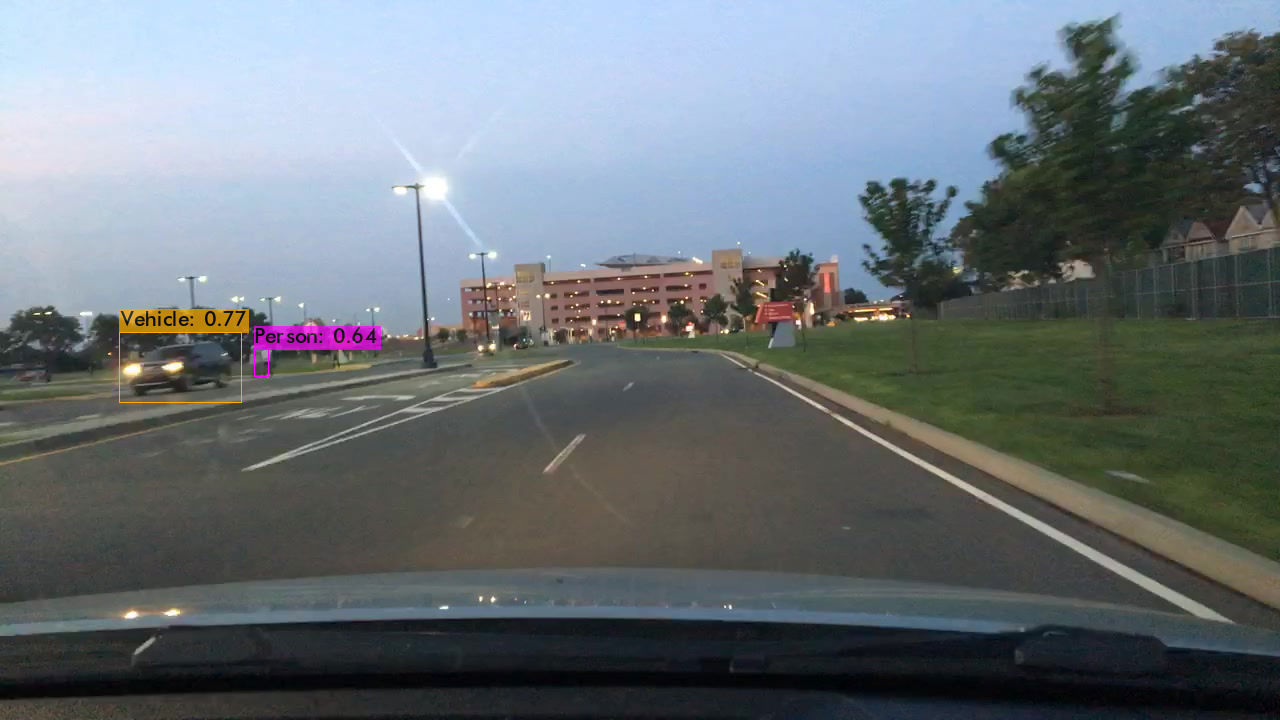

%%HTML
<video width="720" height="450" controls>
  <source src="D:/StudyKit/2021-11-13 AI, ML PG Course at IIIT, Hyd/Project#03/05 Training Process/2021-12-21 On Colab with GPU [Kalyana's Gmail ID]/Training - 0000f77c-62c2a288/0000f77c-62c2a288_predictions.mp4" type="video/mp4">
</video>

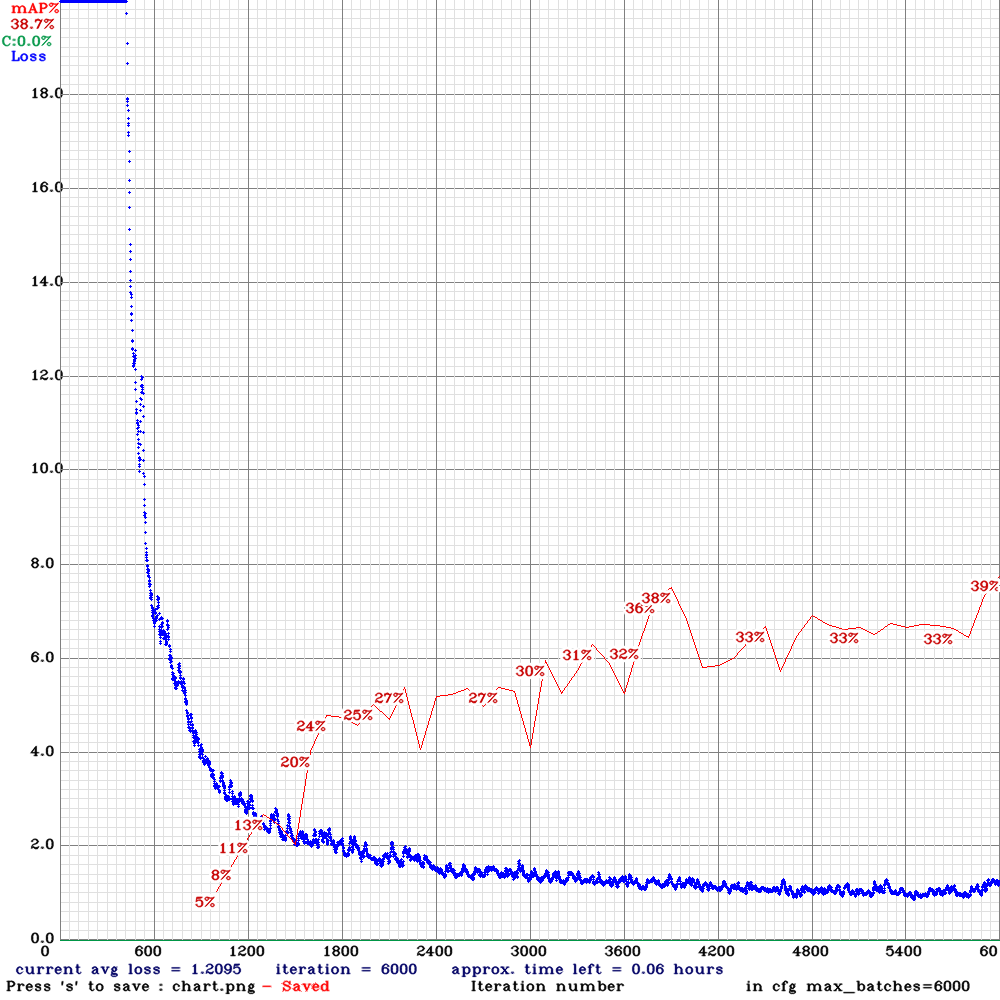

<font font size="4" color=Red>**02. Issues we are Facing.**</font>

01. Need to study and understand regarding when to stop training.

<font font size="4" color=Blue>**03. Steps we are planning to take.**</font>
01. Plan to regularly update the 'git' repository
02. Once both training process and testing process are success then prepare the paper to publish.

<font font size="4" color=Purple>**Suggestions from Professors and Mentors.**</font>


01. Are we on the correct path and/or in the right direction?
02. What are the next steps?
03. Suggestions for improvement w.r.t. the process, methods, tools etc.

<font font size="6" color=Orange>**Meeting Agenda (18/Dec/2021):**</font>

<font font size="4" color=Green>**01. Things we have Implemented.**</font>

01. Taken a video of length 40 seconds from 'bdd100k' dataset. Implemented Python code to break a video into frames. Got 1211 frames and selected the first 606 frames for annotation.  Also implemented Python code to to generate a video from frames.
02. Manually done the bounding box annotation for all the 606 frames using 'LableIMG' tool.  Used these 606 images, the corresponding text files and the classes file for training process. We have used two classes 'Car' and 'Person'.
03. Implemented Python code to generate necessary configuration files required by YOLOv3 algorithm.
04. All the steps necessary to reach training process. Step-01 to Step-10 of this notebook file.  Started training process.
05. Executed the similar steps on a Ubuntu 20.04 LTS system and got the 'yolov3_labelled_train_1000.weights' file.  Also got weights files for every 100 iterations. Tested two images with 'yolov3_labelled_train_1000.weights' file but not working.

<font font size="4" color=Red>**02. Issues we are Facing.**</font>

01. Able to get the predictions with COCO data config files and weight files but not with our class, config files and weight file (yolov3_labelled_train_1000.weights).  Captured the output the the command execution in both cases and tried to analyze the difference using BeyondCompare (Please check the 'Beyond Compare' application).  Tried few combinations i.e. our config files and COCO weights file and vice versa, bit nothing did work.
02. How to understand and analyze the training output.
03. How to use GPU in the Google Colab as well as on Ubuntu system.
    a. How useful is enabling GUP in Google Colab environment.
    b. How to compile Makefile with GPU, CUDA flags enabled.
04. When to stop training.
05. What is 'darknet53.conv.74'.
06. How to avoid the long training process.
07. How to avoid Google Colab disconnecting while training and copying huge files.
08. How to copy files between Google Colab folders and local Windows/Linux folders.

<font font size="4" color=Blue>**03. Steps we are planning to take.**</font>
01. Plan to use 'bdd100k' images and the corresponding json files for final training. Planning to implement Python code which converts the json data into YOLOv3 formatted data. This will avoid preparation of bounding box manually and save huge amount of time w.r.t. data preparation.
02. Plan to create a 'git' repository to for this project and move all the files to 'github'.  This will help us in two ways:<br>
  a. Allow us to track the development cycle.<br>
  b. Avoid all the manual file copying work to Google Colab or Amazon Sagemaker.
02. Give a try with Google Colab and GPU combination for quick training process.
03. Give a try with Amazon SageMaker for quick training process.
04. Once training process is success, test with few images.
05. Once both training process and testing process are success then,<br>
    a. Download 'MOT 2020 Images' and 'MOT 2020 Labels'.<br>
    b. Make a decision on the number of classes of objects.<br>
    c. Implement a Python script that convert the Json formatted 'MOT 2020 Labels' into YOLOv3 formatted text files for the corresponding 'MOT 2020 Images' by keeping the number of classes of objects.<br>
    d. Use these 'MOT 2020 Images' files and the corresponding text files for final training and validation processes.<br>
    e. Create necessary class, data and configuration files in YOLOv3 format.<br>
    f. Complete the final training and validation process.  Then complete the final testing process.<br>
    g. Prepare the paper to publish.

<font font size="4" color=Purple>**Suggestions from Professors and Mentors.**</font>


01. Are we on the correct path and right direction?
02. What are the next steps?
03. Suggestions for improvement w.r.t. the process, methods, tools etc.